# Assignment 5 - Geometric Transformations of Images

Prepared by: Yu Feng, Chuan Chen, Yi Zhang (Chair of Cartography and Visual Analytics, TUM)

Contact: y.feng@tum.de, chuan.chen@tum.de

### Dependencies 
Please run the following block first if you have installed the necessary dependencies.

In [ ]:
!pip install numpy
!pip install opencv-contrib-python-headless==4.7.0.68
!pip install matplotlib
!pip install scikit-image

### Import the 3rd party libraries

In [1]:
# Numpy offers comprehensive mathematical functions in Python
import numpy as np

# OpenCV provides a optimized tools for Computer Vision.
import cv2 as cv

# Matplotlib is a library for creating visualizations in Python.
from matplotlib import pyplot as plt

Geometric transformations are fundamental operations in computer vision and image processing, and they are used to modify the position, size, and orientation of objects in an image. By applying these transformations, we can correct distortions in images, enhance features, and even create artistic effects.

Throughout this homework, you will be introduced to the basics of image manipulation in Python using the `OpenCV` library, a powerful tool for image processing and computer vision tasks. You will learn how to perform various geometric transformations such as `scaling`, `translation`, `rotation`, `affine transformation`, and `perspective transformation`, and you will apply these techniques to real-world images. 

By completing this homework, you will gain a solid understanding of how to use Python and OpenCV for image processing tasks and will have the skills to manipulate and transform digital images with ease. Let's get started!

### Task 1: Scaling
Scaling involves resizing an image, either by increasing or decreasing its size. Scaling can be used to zoom in on specific features of an image or to resize an image to fit a particular display or output size.

Steps:
1. load an image from `"example/Arena.jpg"`, convert its channel into RGB (In the following task, you may also need to do this but it will not remind you again)
2. scaling the original image into half of its original size, use `bilinear` interpolation 
3. scaling the original image into size (width=370,height=430), use `bicubic` interpolation
4. display all three images in one row (won't be tested)

Variables:
1. `src_img` : loaded image
2. `half_size` : result of step 2
3. `arbitrary_size` : result of step 3

Hints:
1. Function [cv.imread](https://docs.opencv.org/4.x/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56) to load the image.
2. Function [cv.resize](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d) to scaling the image, check [InterpolationFlags](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121) to learn about different interpolation methods.
3. Function [plt.imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) and [plt.subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html) to display the images.

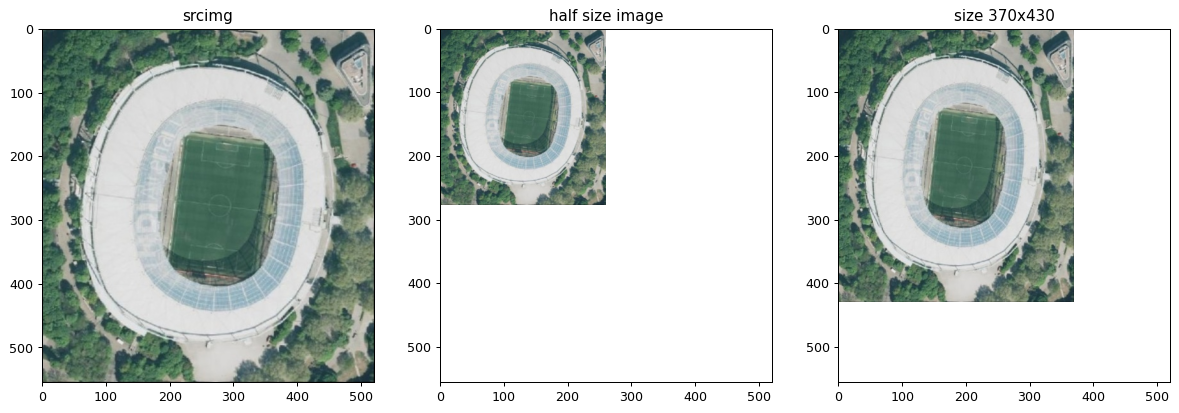

In [2]:
### BEGIN SOLUTION

### END SOLUTION
# display
plt.figure(figsize=(16, 8), dpi=91)
height, width = src_img.shape[:2]
ax1 = plt.subplot(1,3,1)
plt.imshow(src_img)
plt.title("srcimg")
plt.subplot(1,3,2,xlim=(0,width),ylim=(height,0))
plt.imshow(half_size)
plt.title("half size image")
plt.subplot(1,3,3,xlim=(0,width),ylim=(height,0))
plt.imshow(arbitrary_size)
plt.title("size 370x430")
plt.show()

In [ ]:
def public_test1():
    try:
        src_img
    except NameError:
        print("[Error] Variable src_img is not defined.")
        return False
    
    try:
        half_size
    except NameError:
        print("[Error] Variable half_size is not defined.")
        return False
    
    try:
        arbitrary_size
    except NameError:
        print("[Error] Variable arbitrary_size is not defined.")
        return False
    return True

assert public_test1()



### Task 2: Affine Transformation
Affine transformation is a type of geometric transformation that preserves the straightness of lines and the parallelism of lines in an image. In other words, affine transformations preserve the basic shape of an object in an image while changing its position(translation), orientation(rotation), and scale.

An affine transformation can be described by a 2x3 transformation matrix that includes elements for translation, rotation, and scaling. The transformation matrix is used to map the original image to a new transformed image, which is given by
$$
\begin{equation*}
    \begin{aligned}
        M & = \left[
            \begin{array}{cc}
                R & T
            \end{array}
        \right]
    \end{aligned}
\end{equation*}
$$
where $R$ is the 2x2 matrix and T is the 2x1 translation vector.

In this task you should use affine transform to scaling the `src_img`.

Steps:
1. create a transformation matrix (dtype = float32) of the form
$$
\begin{equation*}
    \begin{aligned}
        M & = \left[
            \begin{array}{ccc}
                0.5 & 0 & 0 \\
                0 & 0.5 & 0 
            \end{array}
        \right]
    \end{aligned}
\end{equation*}
$$
2. implement this matrix to `src_img`, use `bicubic` interpolation
3. display `src_img`,`half_size`,and the result of this task (won't be tested)

Variables:
1. `M1` : transformation matrix
2. `scaling_by_affine` : the result of scaling affine transformation, same size as `half_size`

Hints:
1. Use [numpy](https://numpy.org/doc/stable/reference/arrays.scalars.html#numpy.float32) to create matrix.
2. Function [cv.warpAffine](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga0203d9ee5fcd28d40dbc4a1ea4451983) to implement affine transformation.

In [ ]:
### BEGIN SOLUTION

### END SOLUTION

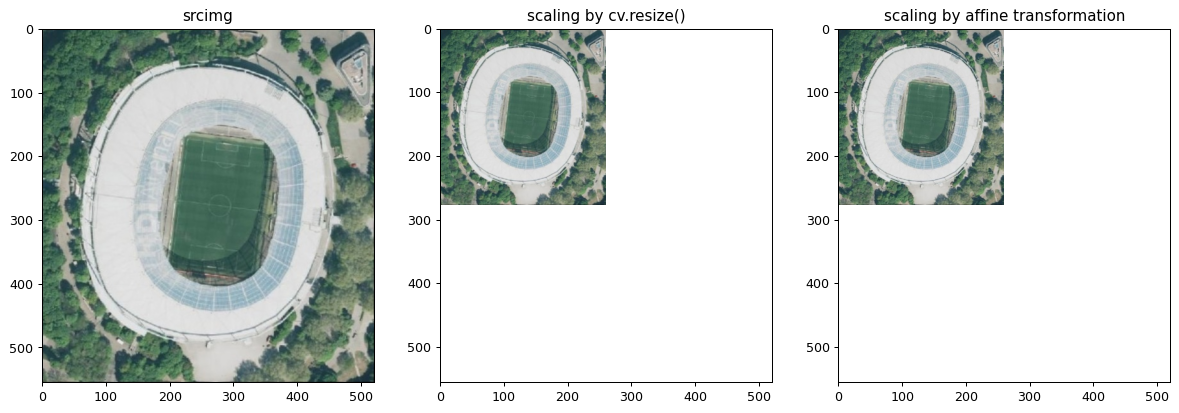

In [5]:
def public_test2():
    try:
        M1
    except NameError:
        print("[Error] Variable M1 is not defined.")
        return False
    
    try:
        M1.shape == (2,3)
    except:
        print("[Error] The shape of M1 is wrong.")
        return False
    
    try:
        M1[0,0] == 0.5
    except NameError:
        print("[Error] The pixel (0,0) of M1 should be 0.5.")
        return False
    
    try:
        scaling_by_affine
    except NameError:
        print("[Error] Variable scaling_by_affine is not defined.")
        return False

    
    return True

assert public_test2()



### Task 3: Translation
Translation involves shifting an image in a particular direction without changing its size or shape. It is useful for correcting misaligned images or for creating image sequences that simulate motion. If you want to shift the image in the (x,y) direction with distance (tx,ty), you can create the transformation matrix M, which is given by
$$
\begin{equation*}
    \begin{aligned}
        M & = \left[
            \begin{array}{ccc}
                1 & 0 & t_x\\
                0 & 1 & t_y
            \end{array}
            \right]
    \end{aligned}
\end{equation*}
$$

Steps:
1. According to what you learn from task 2, implment the same affine transform on `src_img` without changing the size of output.
2. create a shift matrix with (tx = 125, ty = 100, dtype = float32)
3. shift the `src_img` using the shift matrix (affine transformation), use `bicubic` interpolation. You can also consider using only one transform matrix to achieve the three steps above.
4. display the result (won't be tested)

Variables:
1. `M2` : shift matrix or matrix of overall transformation. 
2. `translation_result` : result image with same shape as `src_img`.

Hints:
1. The transformations can be binded together. In this case, we can use the following fomular:
$$
\begin{equation*}
    \begin{aligned}
        M_1 & = \left[
            \begin{array}{cc}
                R_1 & 0
            \end{array}
            \right] \\
        M_2 & = \left[
            \begin{array}{cc}
                I & T_2
            \end{array}
            \right] \\
        M_{overall} & =\left[
            \begin{array}{cc}
                R_1 & T_2 
            \end{array}
            \right]
    \end{aligned}
\end{equation*}
$$
the result of implementing $M_{overall}$ is the same with the result of implementing $M_1$ and $M_2$ in order.

In [ ]:
### BEGIN SOLUTION

### END SOLUTION

In [ ]:
def public_test3():
    try:
        M2
    except NameError:
        print("[Error] Variable M2 is not defined.")
        return False

    try:
        M2.shape == (2,3)
    except:
        print("[Error] The shape of M2 is wrong.")
        return False
    
    try:
        M2[0,2] == 0.5
    except NameError:
        print("[Error] The pixel (0,2) of M2 should be 125.")
        return False
    
    try:
        translation_result
    except NameError:
        print("[Error] Variable translation_result is not defined.")
        return False
    return True

assert public_test3()



### Task 4: Rotation
Rotation involves rotating an image by a certain angle around a specified point. It is commonly used for image alignment, correction of tilted images, or for creating special effects such as spiral patterns.If you want to rotate the image around the origin (left top corner) for an angle θ(counter clockwise), you can create the rotation matrix R, which is given by
$$
\begin{equation*}
    \begin{aligned}
        R & = \left[
            \begin{array}{cc}
                \cos(\theta) & -\sin(\theta) \\
                \sin(\theta) & \cos(\theta) 
            \end{array}
            \right]
    \end{aligned}
\end{equation*}
$$
If you want to rotate the image around arbitrary point, you can use the modified transformation matrix, which is given by
$$
\begin{equation*}
    \begin{aligned}
        M & = \left[
            \begin{array}{ccc}
                \alpha & \beta & (1-\alpha) \cdot x_{center} - \beta \cdot y_{center}\\
                -\beta & \alpha & \beta \cdot x_{center} - (1-\alpha) \cdot y_{center} 
            \end{array}
            \right]
    \end{aligned}
\end{equation*}
$$
where
$$
\begin{equation*}
    \begin{aligned}
        \alpha & = scale \cdot \cos(\theta) \\
        \beta & = scale \cdot \sin(\theta)
    \end{aligned}
\end{equation*}
$$

Steps:
1. create a rotation transformation matrix, which rotate the image around the image center for 45 degree without scaling
2. implement the matrix on `translation_result`, use `bicubic` interpolation. 
3. display the result (won't be tested)

Variables:
1. `M3` : the rotation transformation matrix
2. `rotation_result` : the result of rotation

Hints:
1. Good News! You can only use function [cv.getRotationMatrix2D](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#gafbbc470ce83812914a70abfb604f4326) to get modified transformation matrix instead of calculate it manually.

In [ ]:
### BEGIN SOLUTION

### END SOLUTION

In [ ]:
def public_test4():
    try:
        M3
    except NameError:
        print("[Error] Variable M3 is not defined.")
        return False

    try:
        M3.shape == (2,3)
    except:
        print("[Error] The shape of M3 is wrong.")
        return False
    
    try:
        M3[0,0] == M3[0,1]
    except NameError:
        print("[Error] The pixel (0,0) of M3 should be the same as the pixel (0,1) of M3.")
        return False
    
    try:
        rotation_result
    except NameError:
        print("[Error] Variable rotation_result is not defined.")
        return False
    
    return True

assert public_test4()



### Task 5: arbitrary affine transform
You can also define arbitrart affine transformation. To find the transformation matrix, three points from the input image and their corresponding locations in the output image is needed.

Steps:
1. load an image from `"example/Arena_affine.jpg"` 
2. create an affine transform matrix between these three points
```
(50,40) -> (0,0)
(400,30) -> (521,0)
(40,470) -> (0,555)
```
3. implement this matrix on the loaded image, use `bicubic` interpolation. 
4. display the result (won't be tested)

Variables:
1. `affine_src` : loaded image of step 1
2. `M4` : affine tranformation matrix
3. `affine_result` : result of step 3

Hints:
1. Function [cv.getAffineTransform](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#ga47069038267385913c61334e3d6af2e0) to calculates an affine transform from three pairs of the corresponding points.

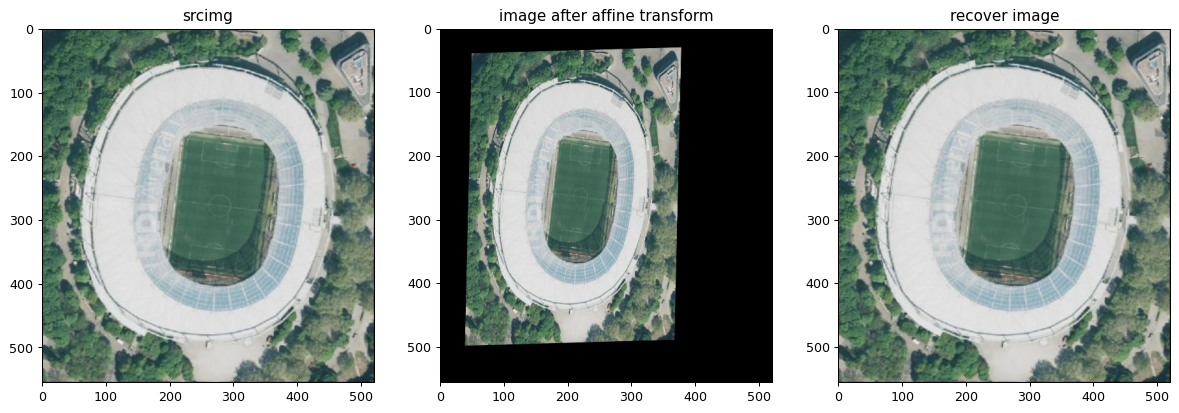

In [10]:
### BEGIN SOLUTION

### END SOLUTION

In [ ]:
def public_test5():
    try:
        M4
    except NameError:
        print("[Error] Variable M4 is not defined.")
        return False

    try:
        M4.shape == (2,3)
    except:
        print("[Error] The shape of M4 is wrong.")
        return False

    try:
        affine_src
    except NameError:
        print("[Error] Variable affine_src is not defined.")
        return False
    
    try:
        affine_result
    except NameError:
        print("[Error] Variable affine_result is not defined.")
        return False
    return True

assert public_test5()



### Task 6: Perspective Transformation
Perspective transformation is a type of geometric transformation that maps a region of an image onto a new plane to change its perspective. Unlike affine transformations, perspective transformations can change the shape of an object in an image, making it appear to be viewed from a different angle or distance. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear.

Steps:
1. load an image from `"example/Arena_perspective.jpg"` 
2. create an perspective transform matrix between these four points
```
(50,100) -> (0,0)
(470,110) -> (521,0)
(70,510) -> (0,555)
(340,390) -> (521,555)
```
3. implement this matrix on the loaded image, use `bicubic` interpolation. 
4. display the result (won't be tested)

Variables:
1. `M5` : perspective transform matrix
2. `perspective_result` : result of step 3

Hints:
1. Function [cv.getPerspectiveTransform](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#gae66ba39ba2e47dd0750555c7e986ab85) to calculates an perspective transform from four pairs of the corresponding points.
2. Function [cv.warpPerspective](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html#gaf73673a7e8e18ec6963e3774e6a94b87) to implement perspective transformation

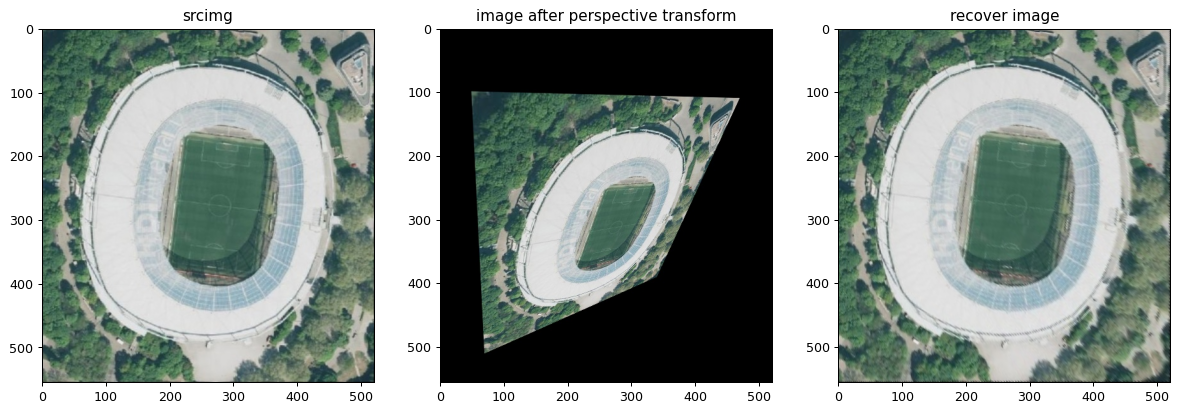

In [12]:
### BEGIN SOLUTION

### END SOLUTION

In [ ]:
def public_test6():
    try:
        M5
    except NameError:
        print("[Error] Variable M5 is not defined.")
        return False

    try:
        M5.shape == (3,3)
    except:
        print("[Error] The shape of M5 is wrong.")
        return False
    
    try:
        perspective_src
    except NameError:
        print("[Error] Variable perspective_src is not defined.")
        return False
    
    try:
        perspective_result
    except NameError:
        print("[Error] Variable perspective_result is not defined.")
        return False
    return True

assert public_test6()

